# Volume 4: Introduction to Initial Value Problems and Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use solve_ivp to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

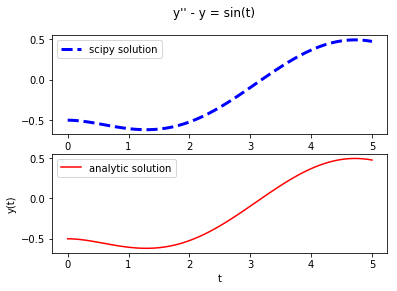

In [88]:
def ode(t, y):
    """Define the ODE system."""
    return np.array([y[1], np.sin(t) + y[0]])

# Initialize time domain 
t_span = (0, 5)
t = np.linspace(0, 5, 100)

# Initialize initial conditions 
y0 = np.array([-0.5, 0])

# Solve the system 
sol = solve_ivp(ode, t_span, y0, max_step = 0.1)

# Generate figures and plot solutions 
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True)
ax1.plot(sol.t, sol.y[0], "--", color = "blue", label = "scipy solution", linewidth = 3)
ax2.plot(t, -0.5*(np.exp(-t) + np.sin(t)), color = "red", label = "analytic solution")

# Update figure labels and show plot
plt.xlabel("t")
plt.ylabel("y(t)")
plt.suptitle(r"y'' - y = sin(t)")
ax1.legend()
ax2.legend()
plt.show()

### Problem 2

Use solve_bvp to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

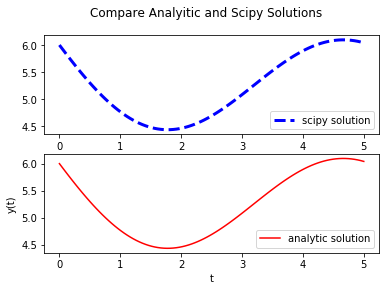

In [89]:
def ode(t, y):
    """Define the ODE system."""
    return np.array([y[1], -.25*np.exp(-0.5*t) + np.sin(t) - np.cos(t) - y[1]])

def bc(ya, yb):
    """Define the boundary conditions."""
    return np.array([ya[0] - 6, yb[1] + 0.324705])

# Initialize time domain 
t_steps = 100
t = np.linspace(0, 5, t_steps)

# Initialize initial conditions 
y0 = np.ones((2, t_steps))

# Solve the system 
sol = solve_bvp(ode, bc, t, y0)

# Generate figures and plot solutions 
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True)
ax1.plot(sol.x, sol.y[0], "--", color = "blue", label = "scipy solution", linewidth = 3)
ax2.plot(t, np.exp(-0.5*t) - np.sin(t) + 5, color = "red", label = "analytic solution")

# Update figure labels and show the plot 
plt.xlabel("t")
plt.ylabel("y(t)")
plt.suptitle("Compare Analyitic and Scipy Solutions")
ax1.legend()
ax2.legend()
plt.show()

### Problem 3

Use solve_bvp to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

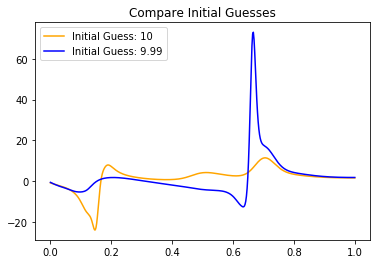

In [49]:
def ode(t, y):
    """Define the ODE system."""
    return np.array([y[1], (1 - y[1])*10*y[0]])

def bc(ya, yb):
    """Define the boundary conditions."""
    return np.array([ya[0] + 1, yb[0] - 1.5])

# Initialize the time domain 
t_steps = 50
t = np.linspace(0, 1, t_steps)

# Initialize multiple initial conditions 
y0 = np.ones((2, t_steps))*10
y1 = np.ones((2, t_steps))*9.99

# Solve the system with multiple initial conditions 
sol0 = solve_bvp(ode, bc, t, y0)
sol1 = solve_bvp(ode, bc, t, y1)

# Plot the different solutions 
plt.plot(sol0.x, sol0.y[0], color = "orange", label = "Initial Guess: 10")
plt.plot(sol1.x, sol1.y[0], color = "blue", label = "Initial Guess: 9.99")
plt.title("Compare Initial Guesses")
plt.legend()
plt.show()

### Problem 4
Use solve_ivp to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

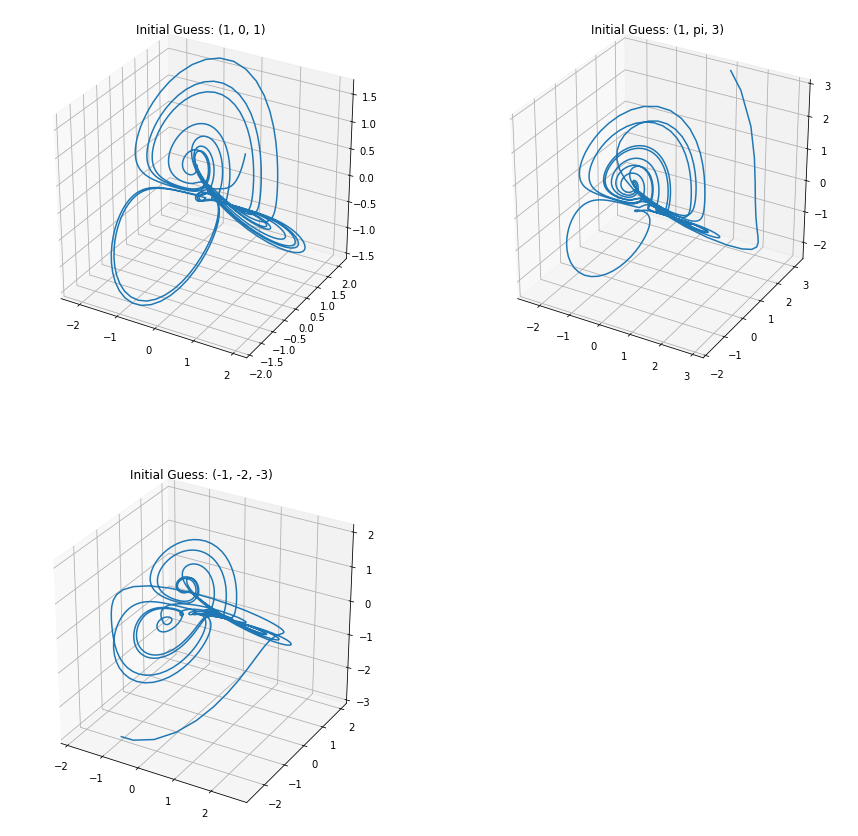

In [84]:
def ode(t, y):
    """Define the ODE system."""
    a, b, c = 0.2, 0.01, -0.4
    return np.array([a*y[0] + y[1]*y[2], b*y[0] + c*y[1] - y[0]*y[2], -y[2] - y[0]*y[1]])

# Initialize the time domain 
t_span = (0, 300)
t = np.linspace(0, 5, 100)

# Initialize multiple initial conditions 
y0 = np.array([1, 0, 1])
y1 = np.array([1, np.pi, 3])
y2 = np.array([-1, -2, -3])

# Solve the system with multiple initial conditions 
sol0 = solve_ivp(ode, t_span, y0, max_step = 0.1)
sol1 = solve_ivp(ode, t_span, y1, max_step = 0.1)
sol2 = solve_ivp(ode, t_span, y2, max_step = 0.1)

# Generate the figure
figure = plt.figure(figsize = (15, 15))
ax1 = figure.add_subplot(2, 2, 1, projection = "3d", title = "Initial Guess: (1, 0, 1)")
ax2 = figure.add_subplot(2, 2, 2, projection = "3d", title = "Initial Guess: (1, pi, 3)")
ax3 = figure.add_subplot(2, 2, 3, projection = "3d", title = "Initial Guess: (-1, -2, -3)")

# Plot the solutions 
ax1.plot(sol0.y[0], sol0.y[1], sol0.y[2])
ax2.plot(sol1.y[0], sol1.y[1], sol1.y[2])
ax3.plot(sol2.y[0], sol2.y[1], sol2.y[2])